# Cross-validation and $C_p$ estimates

Consider the Supernova data from the chapter

In [3]:
import pandas as pd
import requests
from io import StringIO

url = "https://hastie.su.domains/CASI_files/DATA/supernova.txt"

df = pd.read_csv(url, sep="\s+")

# Show the first 5 rows of the dataframe
print(df.head())

        E1     E2     E3     E4     E5     E6     E7     E8     E9    E10   
SN1 -0.839 -0.927  0.320  0.176 -0.676 -1.272  0.342 -0.427 -0.016 -0.298  \
SN2 -1.892 -0.455  2.407  0.766 -0.944 -1.527  0.088  0.261  0.185 -0.537   
SN3  0.264 -0.803  1.141 -0.863  0.685 -0.354 -1.038 -1.098 -1.319 -1.695   
SN4 -0.083  1.023 -0.206 -1.115 -0.863  0.715  0.616  0.564  0.615 -0.488   
SN5  0.411 -0.807 -0.129  1.315 -0.647  0.299 -0.822 -1.534 -1.486 -1.087   

     Magnitude  
SN1     -0.543  
SN2      2.124  
SN3     -0.217  
SN4      0.946  
SN5     -3.746  


## Choice of prediction rule

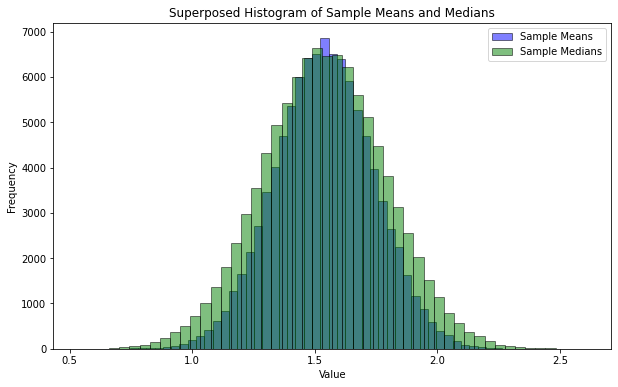

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Number of repetitions to estimate the sampling distribution
repetitions = 100000

# Number of samples in each sample set
sample_size = 25

# Standard deviation of the distribution
std_dev = 1

# Generating a random mean from a uniform distribution between 0 and 10
mu = np.random.uniform(0, 10)

# To store the sample means and medians
sample_means = []
sample_medians = []

for _ in range(repetitions):
    # Generate 25 samples from a normal distribution
    samples = np.random.normal(loc=mu, scale=std_dev, size=sample_size)
    
    # Calculate and store the sample mean
    sample_means.append(np.mean(samples))
    
    # Calculate and store the sample median
    sample_medians.append(np.median(samples))

# Create a histogram of the sample means and medians
plt.figure(figsize=(10, 6))

plt.hist(sample_means, bins=50, alpha=0.5, label='Sample Means', color='blue', edgecolor='k')
plt.hist(sample_medians, bins=50, alpha=0.5, label='Sample Medians', color='green', edgecolor='k')

plt.title('Superposed Histogram of Sample Means and Medians')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend(loc='upper right')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


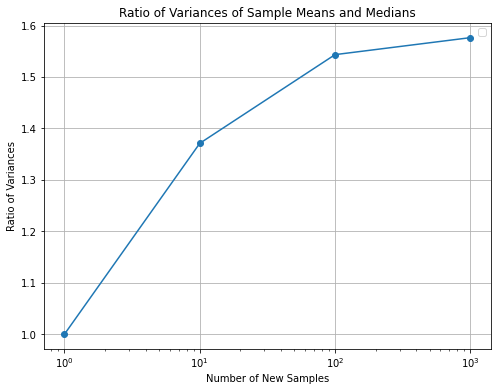

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Number of repetitions to estimate the sampling distribution
repetitions = 100000

# Number of samples in each sample set
sample_size = 25

# Standard deviation of the distribution
std_dev = 1

# Generating a random mean from a uniform distribution between 0 and 10
mu = np.random.uniform(0, 10)

# Evaluation sizes for new samples
evaluation_sizes = [1, 10, 100, 1000]

# To store the results
var_ratios = []

for size in evaluation_sizes:
    # To store the variances
    var_means = []
    var_medians = []
    
    for _ in range(repetitions):
        # Generate new samples
        new_samples = np.random.normal(loc=mu, scale=std_dev, size=size)
        
        # Calculate the mean and median of the new samples
        new_sample_mean = np.mean(new_samples)
        new_sample_median = np.median(new_samples)
        
        # Store the mean and median
        var_means.append(new_sample_mean)
        var_medians.append(new_sample_median)
    
    # Calculate the variances
    var_new_sample_means = np.var(var_means, ddof=1)
    var_new_sample_medians = np.var(var_medians, ddof=1)
    
    # Calculate the ratio
    var_ratio = var_new_sample_medians / var_new_sample_means
    
    # Store the result
    var_ratios.append(var_ratio)

# Plotting the results
plt.figure(figsize=(8, 6))
plt.plot(evaluation_sizes, var_ratios, marker='o')
plt.xscale('log')
plt.title('Ratio of Variances of Sample Means and Medians')
plt.xlabel('Number of New Samples')
plt.ylabel('Ratio of Variances')
plt.grid(True)
plt.show()


# $C_p$ estimates

### Mallows’ $C_p$ estimate

Mallows’ $C_p$ is a statistical method used to evaluate the performance of linear regression models. It was developed by Colin L. Mallows with the goal of helping practitioners select the best subset of predictors for their regression model.

### Formula:

The $C_p$ statistic is calculated as follows:

$$ C_p = \frac{SSE_p}{S^2} - n + 2p $$

where:
- $SSE_p$ is the sum of squared errors for the model with $p$ predictors.
- $S^2$ is an estimate of the variance of the error term, usually taken from the full model (a model with all predictors included). It is calculated as the Residual Sum of Squares divided by the degrees of freedom.
- $n$ is the number of observations.
- $p$ is the number of predictors in the model.

### Interpretation:

- A $C_p$ value close to $p$ suggests that the model is relatively unbiased in estimating the true regression coefficients and predicting future responses. This indicates a good model fit.
- A $C_p$ value significantly greater than $p$ may suggest that the model is too simple and is under-fitting the data.
- A $C_p$ value significantly less than $p$ could indicate that the model is unnecessarily complex and may be over-fitting the data.



In [3]:
import numpy as np
import statsmodels.api as sm

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n = 100
X1 = np.random.normal(size=n)
X2 = np.random.normal(size=n)
X3 = np.random.normal(size=n)
epsilon = np.random.normal(size=n)
Y = 2 + 3 * X1 - 2 * X2 + 1.5 * X3 + epsilon

# Model with all predictors
X_full = sm.add_constant(np.column_stack((X1, X2, X3)))
full_model = sm.OLS(Y, X_full).fit()
sigma_hat_squared = np.sum(full_model.resid ** 2) / (n - 4)  # Adjusted for degrees of freedom (n - p - 1)

# Model A: Only X1 and X2
X_A = sm.add_constant(np.column_stack((X1, X2)))
model_A = sm.OLS(Y, X_A).fit()
RSS_A = np.sum(model_A.resid ** 2)
Cp_A = (RSS_A / sigma_hat_squared) - n + 2 * (3)

# Model B: X1, X2, and X3
X_B = X_full
model_B = sm.OLS(Y, X_B).fit()
RSS_B = np.sum(model_B.resid ** 2)
Cp_B = (RSS_B / sigma_hat_squared) - n + 2 * (4)

print("Model A - C_p:", Cp_A)
print("Model B - C_p:", Cp_B)


Model A - C_p: 336.9741412251219
Model B - C_p: 4.0


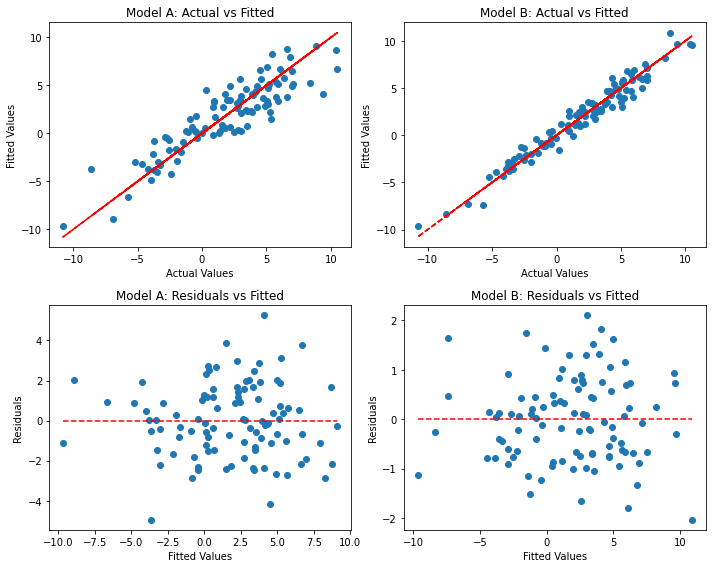

In [4]:
import matplotlib.pyplot as plt

# Plotting the results
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Actual vs Fitted Values for Model A
axs[0, 0].scatter(Y, model_A.fittedvalues)
axs[0, 0].plot(Y, Y, color='red', linestyle='--')
axs[0, 0].set_title('Model A: Actual vs Fitted')
axs[0, 0].set_xlabel('Actual Values')
axs[0, 0].set_ylabel('Fitted Values')

# Residuals vs Fitted Values for Model A
axs[1, 0].scatter(model_A.fittedvalues, model_A.resid)
axs[1, 0].hlines(0, min(model_A.fittedvalues), max(model_A.fittedvalues), color='red', linestyle='--')
axs[1, 0].set_title('Model A: Residuals vs Fitted')
axs[1, 0].set_xlabel('Fitted Values')
axs[1, 0].set_ylabel('Residuals')

# Actual vs Fitted Values for Model B
axs[0, 1].scatter(Y, model_B.fittedvalues)
axs[0, 1].plot(Y, Y, color='red', linestyle='--')
axs[0, 1].set_title('Model B: Actual vs Fitted')
axs[0, 1].set_xlabel('Actual Values')
axs[0, 1].set_ylabel('Fitted Values')

# Residuals vs Fitted Values for Model B
axs[1, 1].scatter(model_B.fittedvalues, model_B.resid)
axs[1, 1].hlines(0, min(model_B.fittedvalues), max(model_B.fittedvalues), color='red', linestyle='--')
axs[1, 1].set_title('Model B: Residuals vs Fitted')
axs[1, 1].set_xlabel('Fitted Values')
axs[1, 1].set_ylabel('Residuals')

plt.tight_layout()
plt.show()


### Stein’s unbiased risk estimate

Stein’s Unbiased Risk Estimator (SURE) is a technique used to estimate the mean squared error (MSE) of an estimator, which helps in assessing its performance. Named after Charles Stein, who introduced the concept in the context of shrinkage estimators, SURE provides an unbiased estimate of the risk (expected loss) associated with an estimator, and it is particularly useful when the true underlying distribution of the data is unknown.

The general form of Stein’s Unbiased Risk Estimator is given by:

$$ \text{SURE}(\hat{\theta}) = \sum_{i=1}^{n} (\hat{\theta}_i - x_i)^2 + 2 \cdot \sigma^2 \cdot \text{df} - n \cdot \sigma^2 $$

where:
- $ \hat{\theta}$ is the estimator of the parameter \( \theta \).
- $x$ is the observed data.
- $\sigma^2$ is the variance of the noise.
- $n$ is the number of observations.
- $\text{df}$ is the degrees of freedom, which represents the effective number of parameters being estimated.

The SURE method is particularly advantageous in scenarios where direct calculation of the MSE is not feasible due to the absence of knowledge about the true parameter $\theta$. SURE offers a way to estimate the risk associated with an estimator based solely on the observed data.


MSE: 37.37458180033187
SURE: 59.79933088053099


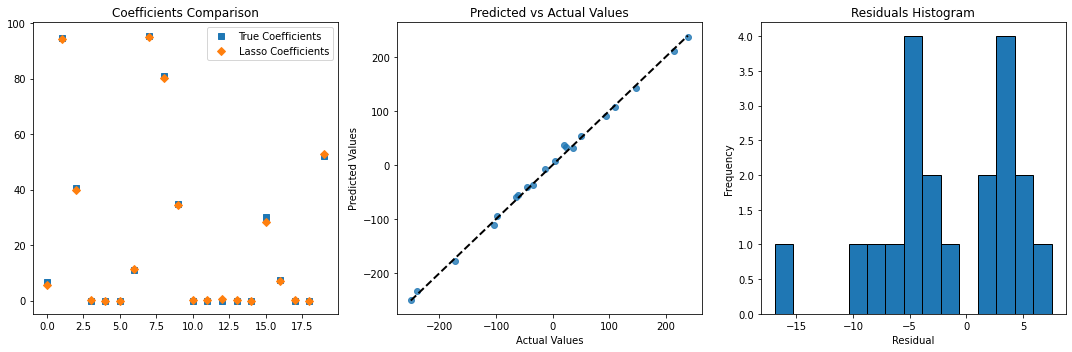

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset
X, y, true_coef = make_regression(n_samples=100, n_features=20, noise=5.0, coef=True, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a Lasso regression model using cross-validation to select the optimal alpha
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Compute the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("MSE:", mse)

# SURE Estimation
residuals = y_test - y_pred
sigma_hat = np.sqrt(np.sum(residuals ** 2) / len(y_test))
df = np.sum(np.abs(lasso.coef_) > 1e-8)  # Number of non-zero coefficients
sure = np.sum(residuals ** 2) + 2 * df * sigma_hat ** 2 - len(y_test) * sigma_hat ** 2
sure /= len(y_test)

print("SURE:", sure)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Coefficients comparison
axs[0].plot(true_coef, 's', label='True Coefficients')
axs[0].plot(lasso.coef_, 'D', label='Lasso Coefficients')
axs[0].set_title('Coefficients Comparison')
axs[0].legend()

# Predicted vs Actual
axs[1].scatter(y_test, y_pred, alpha=0.8)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title('Predicted vs Actual Values')

# Residuals Histogram
axs[2].hist(residuals, bins=15, edgecolor='k')
axs[2].set_title('Residuals Histogram')
axs[2].set_xlabel('Residual')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


### AIC

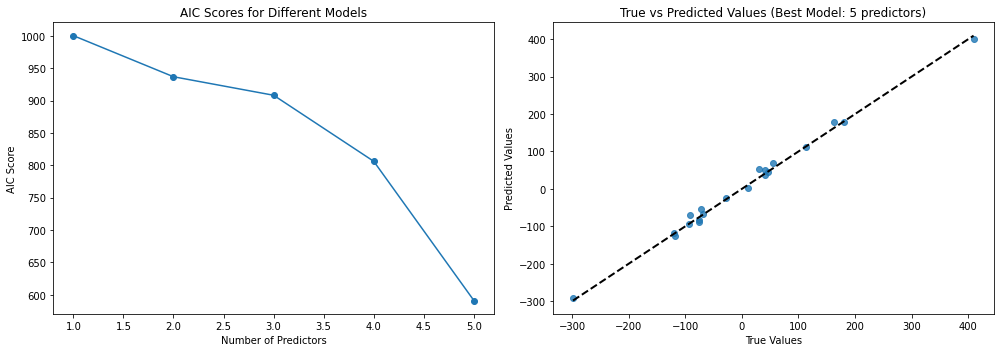

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Set random seed for reproducibility
np.random.seed(42)

# Generate a synthetic dataset
X, y = make_regression(n_samples=100, n_features=5, noise=10.0, random_state=42)

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Adding a constant to the model (intercept)
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit models with varying numbers of predictors and calculate AIC
aic_scores = []
models = []

for i in range(1, 6):
    model = sm.OLS(y_train, X_train[:, :i+1]).fit()
    aic_score = model.aic
    aic_scores.append(aic_score)
    models.append(model)

# Find the model with the lowest AIC
best_model_index = np.argmin(aic_scores)
best_model = models[best_model_index]

# Make predictions using the best model
y_pred = best_model.predict(X_test)

# Create plots
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Plot AIC scores
axs[0].plot(range(1, 6), aic_scores, marker='o')
axs[0].set_xlabel('Number of Predictors')
axs[0].set_ylabel('AIC Score')
axs[0].set_title('AIC Scores for Different Models')

# Plot true vs predicted values for the best model
axs[1].scatter(y_test, y_pred, alpha=0.8)
axs[1].plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
axs[1].set_xlabel('True Values')
axs[1].set_ylabel('Predicted Values')
axs[1].set_title(f'True vs Predicted Values (Best Model: {best_model_index+1} predictors)')

plt.tight_layout()
plt.show()


# Another example

In [9]:
#Generating Synthetic Data
import statsmodels.api as sm

np.random.seed(42)

# Number of observations
n = 100

# Generating synthetic data
X = np.linspace(0, 10, n)
Y_true = 3 + 2 * X + np.random.normal(0, 2, n)
X = sm.add_constant(X)  # Adding a constant for the intercept term

# Splitting the data into two sets for two different models
X_model_1 = X[:, :2]  # Using only the intercept and the linear term
X_model_2 = np.column_stack((X[:, :2], X[:, 1]**2))  # Using intercept, linear, and quadratic terms


In [10]:
# Fitting the models
model_1 = sm.OLS(Y_true, X_model_1).fit()
model_2 = sm.OLS(Y_true, X_model_2).fit()

# Residual Sum of Squares (RSS)
RSS_1 = np.sum(model_1.resid ** 2)
RSS_2 = np.sum(model_2.resid ** 2)

# Estimate of sigma^2
sigma_hat_squared = RSS_1 / (n - 2)

# Mallows' C_p
Cp_1 = (RSS_1 / sigma_hat_squared) - n + 2 * 2
Cp_2 = (RSS_2 / sigma_hat_squared) - n + 2 * 3

# Akaike’s Information Criterion (AIC)
AIC_1 = model_1.aic
AIC_2 = model_2.aic

# Stein’s Unbiased Risk Estimate (SURE)
SURE_1 = n * sigma_hat_squared + RSS_1 - 2 * sigma_hat_squared * 2
SURE_2 = n * sigma_hat_squared + RSS_2 - 2 * sigma_hat_squared * 3

# Summary of model selection criteria
summary = pd.DataFrame({
    'Criterion': ['Mallows\' C_p', 'AIC', 'SURE'],
    'Model 1': [Cp_1, AIC_1, SURE_1],
    'Model 2': [Cp_2, AIC_2, SURE_2]
})

# Print summary
print(summary)


      Criterion     Model 1     Model 2
0  Mallows' C_p    2.000000    3.626471
1           AIC  405.948734  407.566854
2          SURE  645.271487  637.376794
